<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общая-информация." data-toc-modified-id="Общая-информация.-1">Общая информация.</a></span><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.1">Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-1.1.1">Заполнение пропусков</a></span></li><li><span><a href="#Удаление-дубликатов" data-toc-modified-id="Удаление-дубликатов-1.1.2">Удаление дубликатов</a></span></li><li><span><a href="#Преобразование-форматов" data-toc-modified-id="Преобразование-форматов-1.1.3">Преобразование форматов</a></span></li><li><span><a href="#Расчет-суммарных-продаж-во-всех-регионах" data-toc-modified-id="Расчет-суммарных-продаж-во-всех-регионах-1.1.4">Расчет суммарных продаж во всех регионах</a></span></li></ul></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2">Исследовательский анализ данных</a></span></li><li><span><a href="#Портрет-пользователя-каждого-региона" data-toc-modified-id="Портрет-пользователя-каждого-региона-3">Портрет пользователя каждого региона</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4">Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-о-равенестве-средних-пользовательских-рейтингов-платформ-Xbox-One-и-PC" data-toc-modified-id="Гипотеза-о-равенестве-средних-пользовательских-рейтингов-платформ-Xbox-One-и-PC-4.1">Гипотеза о равенестве средних пользовательских рейтингов платформ Xbox One и PC</a></span></li><li><span><a href="#Гипотеза-о-неравенстве-средних-пользовательских-рейтингов-жанров-Action--и-Sports" data-toc-modified-id="Гипотеза-о-неравенстве-средних-пользовательских-рейтингов-жанров-Action--и-Sports-4.2">Гипотеза о неравенстве средних пользовательских рейтингов жанров Action  и Sports</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5">Общий вывод</a></span></li></ul></div>

# Исследование рынка компьютерных игр

В нашем распоряжении исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).  
Необходимо выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании для работы интернет-магазина. 

**Оцениваемы параметры**:  

* год выпуска
* регион продаж
* отзывы критиков
* отзывы пользователей
* возрастной рейтинг ESRB 

**План исследования**:  

* анализ количества выпускаемых игр по годам
* анализ динамики продаж игр по платформам по годам
* оценка платформ, находящихся в росте продаж
* оценка наличия связи между отзывами критиков/пользователей и продажами
* анализ предпочтений пользователей разных регионов
* оценка влияния возрастного рейтинга игры на продажи
* проверка гипотез:
  * средние пользовательские рейтинги платформ Xbox One и PC одинаковые
  * средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные



## Общая информация. 

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [93]:
data = pd.read_csv('/datasets/games.csv', sep=',')

In [94]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Итак, в таблице десять столбцов. Тип данных в столбцах с текстом — object, верно

* `Year_of_Release` можно округлить просто до целого, тк формат времени не дает преимуществ в данном случае
* `User_Score` должен быть float64  
Остальное, на первый взгляд, верно.  

Согласно документации к данным:  

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Предобработка данных

In [96]:
#приведем к нижнему регистру названия столбцов
data.columns = [x.lower() for x in data.columns]

    

In [97]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Заполнение пропусков

In [98]:
#посчитаем пропуски
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [99]:
#посмотрим на пропуски по названию игры
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Рейтинги пустые, год выпуска старый, удалим эти строки, на анализе не отразится

In [100]:
#удалим строки с без названий
data = data.dropna(subset=['name']).reset_index(drop=True)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что удалили пропуски в названии игр, тем более в этих строках еще хватает пропусков по другим колонкам.</font>

In [101]:
#посмотрим на пропуски по году
data.loc[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Можно предположить, что одинаковые игры выходят на разных площадках в один год, проверим 

In [102]:
piv = data.pivot_table(index='name', values='year_of_release', aggfunc=['min', 'max', 'count'])
piv.columns = ['min', 'max','count']
piv['dif'] = piv['max']-piv['min']

piv.loc[piv['count']>1]

,min,max,count,dif
name,,,,
Frozen: Olaf's Quest,2013.0,2013.0,2,0.0
007: Quantum of Solace,2008.0,2008.0,6,0.0
007: The World is not Enough,2000.0,2000.0,2,0.0
11eyes: CrossOver,2009.0,2010.0,2,1.0
18 Wheeler: American Pro Trucker,2001.0,2002.0,2,1.0
...,...,...,...,...
iCarly,2009.0,2009.0,2,0.0
iCarly 2: iJoin The Click!,2010.0,2010.0,2,0.0
nail'd,2010.0,2010.0,2,0.0


In [103]:
#игры на разных площадках могут выходить в один год, но встречаются и разные годы выпуска
#посмотрим много ли их
piv.loc[piv['dif']>0].sort_values(by='dif',ascending=False)

,min,max,count,dif
name,,,,
Battlezone,1982.0,2016.0,3,34.0
Romance of the Three Kingdoms II,1991.0,2015.0,2,24.0
Bomberman,1985.0,2008.0,4,23.0
Final Fantasy III,1990.0,2012.0,4,22.0
Pro Yakyuu Family Stadium,1986.0,2008.0,2,22.0
...,...,...,...,...
MX vs. ATV Untamed,2007.0,2008.0,6,1.0
M&M's Kart Racing,2007.0,2008.0,2,1.0
Lunar: Silver Star Story Complete,1997.0,1998.0,2,1.0


Из 2700 игр, встречающихся более одного раза(там где нет пропусков по годам), 700 имеют разные года выпуска.

Таким образом, можно заменить пропуски по годам по тем играм где более одной строки

In [104]:
#посчитаем количества уникальных игр по столбцу с суммой,чтобы избежать пропусков 
piv_count = data.pivot_table(index='name', values='na_sales', aggfunc=['count'])
piv_count.columns = ['count']


In [105]:
#добавим количество игр и разницу в годах в нашу таблицу
data = data.merge(piv[['dif']], on='name')
data = data.merge(piv_count[['count']], on='name')

Мы можем заменить пропуски по годам, если игра встречается более двух раз, кроме случаев:


In [106]:
#если игра встречается более двух раз и имеет в разницу в годах выпуска(видимо это связано с перевыпусками)
#и мы не можем точно знать какой именно год пропущен
data.loc[(data['year_of_release'].isna())&(data['dif']>0)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,dif,count
481,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+,15.0,4
490,Namco Museum,XB,NaN,Misc,0.77,0.11,0.00,0.04,59.0,tbd,E,1.0,4
927,Hitman 2: Silent Assassin,XB,NaN,Action,0.76,0.38,0.00,0.05,84.0,8,M,1.0,3
1161,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,8.0,4
1184,PES 2009: Pro Evolution Soccer,PSP,NaN,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN,1.0,5
1247,Tomb Raider (2013),PC,NaN,Action,0.06,0.25,0.00,0.04,86.0,8.5,M,1.0,5
1314,Mario Tennis,3DS,NaN,Sports,0.00,0.00,0.02,0.00,NaN,NaN,NaN,10.0,4
2562,Wheel of Fortune,PS2,NaN,Misc,0.47,0.36,0.00,0.12,NaN,tbd,E,13.0,5
4830,Rayman Arena,XB,NaN,Racing,0.05,0.01,0.00,0.00,50.0,tbd,E,1.0,3
8131,Tom and Jerry in War of the Whiskers,XB,NaN,Fighting,0.02,0.01,0.00,0.00,NaN,NaN,NaN,1.0,3


In [107]:
#если игра встречается два раза и одна строка имеет значение года, а вторая нет - 
#в этом случае года могут совпадать, а могут и нет:
data.loc[(data['dif'].isna())&(data['count']==2)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,dif,count
6003,Silent Hill: Homecoming,X360,NaN,Action,0.25,0.15,0.0,0.04,70.0,6.9,M,NaN,2
6004,Silent Hill: Homecoming,PS3,NaN,Action,0.18,0.14,0.0,0.06,71.0,6.9,M,NaN,2
6081,Robert Ludlum's The Bourne Conspiracy,X360,NaN,Action,0.26,0.13,0.0,0.04,71.0,7.2,T,NaN,2
6082,Robert Ludlum's The Bourne Conspiracy,PS3,NaN,Action,0.18,0.14,0.0,0.06,70.0,7.6,T,NaN,2
7348,All-Star Baseball 2005,PS2,NaN,Sports,0.16,0.12,0.0,0.04,72.0,8.6,E,NaN,2
7349,All-Star Baseball 2005,XB,NaN,Sports,0.11,0.03,0.0,0.01,75.0,8.8,E,NaN,2
9653,Backbreaker,X360,NaN,Sports,0.17,0.00,0.0,0.01,54.0,7.6,E,NaN,2
9654,Backbreaker,PS3,NaN,Sports,0.16,0.00,0.0,0.01,58.0,7,E,NaN,2
11225,The Daring Game for Girls,DS,NaN,Adventure,0.11,0.00,0.0,0.01,NaN,tbd,E,NaN,2
11226,The Daring Game for Girls,Wii,NaN,Adventure,0.09,0.00,0.0,0.01,NaN,tbd,E,NaN,2


Выглядит так, что игра встречается два раза и по обеим строкам года выпуска нет.

In [108]:
#Тогда заменим пропуски по годам, там где count >1 и dif = 0

import warnings

warnings.filterwarnings("ignore")

for t in data['name'].unique():
    data.loc[(data['name'] == t) & (data['count'] >1) & (data['dif'] ==0), 'year_of_release'] = \
    data.loc[(data['name'] == t), 'year_of_release'].median()

In [109]:
#проверим что сколько осталось
data.isna().sum()

name                  0
platform              0
year_of_release     158
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dif                 146
count                 0
dtype: int64

Небывалый успех, я заменила 100 строк пропусков)  
Остались игры, где разные года у одного наименования, или нет данных ни по одному году, или есть только один год выпуска и он пустой.  

Удалим их

In [110]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

Проверим **пропуски в возрастных рейтингах**.  
Так как система маркирвки ESRB работает на ПО рынка США и Канады, для игр, выпущенных в другиз странах, этой маркировки не будет. Поэтому заменим эти пропуски заглушкой.

In [111]:
data['rating'] =  data['rating'].fillna('N/A')

**Пропуски по рейтингам игроков и критиков** также заменим заглушкой, тк разные игры на разных платформах и в разные года могут иметь разный рейтинг.  



In [112]:
data[['critic_score','user_score']] =  data[['critic_score','user_score']].fillna(-1)

In [113]:
#проверим оценки пользователей
display(data['user_score'].unique())

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '8.1', '7.9', '9', '8.9', '7.5', '8.7', '8.8', '7.1', '3.4',
       '3.2', '2.5', '1.8', '6.4', '5.2', '5.8', '6', '5.3', '4.8', '4.2',
       '6.9', '7.8', '2.6', '3.7', '4.3', '7.2', '9.2', '7', '7.3', '4.4',
       '2.9', '5.6', '6.1', '1.6', '6.2', '4.1', '7.6', '3.3', '5.7',
       '5.4', '4.9', '4.5', '5', '5.5', '1.7', '9.1', '6.5', 'tbd', '3.8',
       '4.6', '6.7', '3.1', '2.4', '9.4', '6.8', '4.7', '4', '9.3', '3',
       '5.1', '3.5', '5.9', '3.9', '2.7', '3.6', '2.2', '2', '0.7', '0.2',
       '1.9', '1.4', '9.5', '2.1', '9.7', '2.8', '0', '9.6', '0.6', '1.5',
       '1.1', '0.5', '0.3', '1.3', '2.3', '1.2', '0.9', '1'], dtype=object)

Встречается аббревеатура tbd = to be determined - рейтинг не отображается, тк недостаточно оценок.  
Я бы заменила на -1, тк для анализа нам важно только то, что по факту рейтинга нет.

In [114]:
data['user_score'] = data['user_score'].str.replace('tbd', '-1')

In [115]:
data[['critic_score','user_score']] =  data[['critic_score','user_score']].fillna(-1)

In [116]:
#проверим, не осталось ли пропусков
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dif                0
count              0
dtype: int64

In [117]:
#проверим нулевые значения
for i in data.columns.tolist():
    print(i,len(data[data[i]==0]))

name 0
platform 0
year_of_release 0
genre 0
na_sales 4466
eu_sales 5799
jp_sales 10397
other_sales 6522
critic_score 0
user_score 0
rating 0
dif 14677
count 0


Вероятно, оценка не может быть ноль, заменим ее на -1

In [118]:
data['user_score'] = data['user_score'].replace(0, '-1')

**В данных были пропуски.** 
* Пропуски по годам могли возникнуть из-за технических факторов - некорректное объединение таблиц, ошибки в БД
* Пропуски в возрастных рейтингах из-за их отсутствия - система ESRB добровольная и работает на ПО рынка США и Канады  
* Пропуски по оценкам могли возникнуть из-за особенностей источника данных этих оценок, либо их там нет, либо они не подкачались


#### Удаление дубликатов

Проверим янвые дубликаты, по сочетанию колонки Название - Платоформа - Год - Жанр

In [119]:
db = data[data.duplicated(subset=['name','platform','year_of_release','genre'], keep=False)]
display(db)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,dif,count
955,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,0.0,6
959,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.0,6


In [120]:
#удалим вторую строку
data = data.drop_duplicates(subset=['name', 'platform','year_of_release','genre']).reset_index(drop=True)

#### Преобразование форматов

In [121]:
#преобразуем типы данных
data['user_score'] = data['user_score'].astype(float)
data['year_of_release'] = data['year_of_release'].astype(int)


In [122]:
#проверим, не осталось ли некорректных типов данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16554 entries, 0 to 16553
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16554 non-null  object 
 1   platform         16554 non-null  object 
 2   year_of_release  16554 non-null  int64  
 3   genre            16554 non-null  object 
 4   na_sales         16554 non-null  float64
 5   eu_sales         16554 non-null  float64
 6   jp_sales         16554 non-null  float64
 7   other_sales      16554 non-null  float64
 8   critic_score     16554 non-null  float64
 9   user_score       16554 non-null  float64
 10  rating           16554 non-null  object 
 11  dif              16554 non-null  float64
 12  count            16554 non-null  int64  
dtypes: float64(7), int64(2), object(4)
memory usage: 1.6+ MB


#### Расчет суммарных продаж во всех регионах

In [123]:
data.insert(8, "total_sales",data[['na_sales','eu_sales','jp_sales']].sum(axis=1))

In [124]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating,dif,count
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,74.09,76.0,8.0,E,0.0,1
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,39.47,-1.0,-1.0,N/A,14.0,2
2,Super Mario Bros.,GB,1999,Platform,3.40,1.30,0.15,0.22,4.85,-1.0,-1.0,N/A,14.0,2
3,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,32.23,82.0,8.3,E,0.0,1
4,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,29.82,80.0,8.0,E,0.0,1


## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы: 

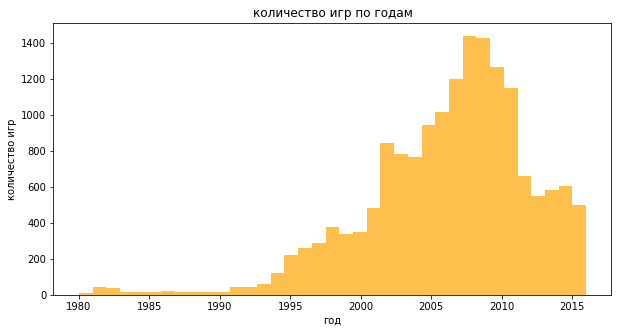

In [125]:
plt.figure(figsize=(10,5))
plt.hist(data['year_of_release'], bins=37,color='orange', alpha=0.7)
plt.xlabel('год')
plt.ylabel('количество игр')
plt.title('количество игр по годам')
plt.show()

Распределение нормальное, отрицательная ассиметрия.  
Рост рынка начался во второй половнине 90 годов.  
Максимально количество выпускаемых игр было в 2008-2009 годах.  
Спад рынка начался в 2012 году.  

Посмотрим, как менялись продажи по платформам и по годам.  
Ддя этого сначала отберем топ платформ по объему продаж:

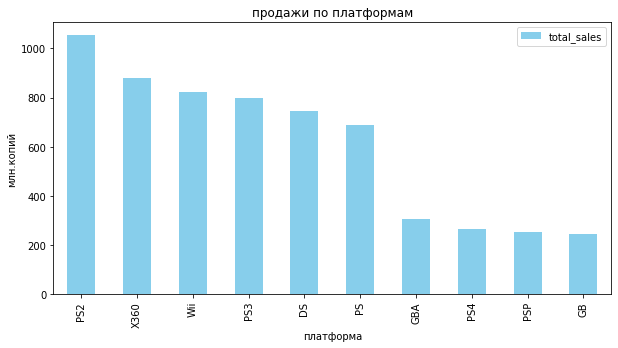

In [126]:
d = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales',ascending=False)[:10]
d.reset_index(inplace= True )

d.plot(x = 'platform', y='total_sales', kind='bar', color='skyblue', figsize = (10,5));
plt.xlabel('платформа')
plt.ylabel('млн.копий')
plt.title('продажи по платформам')
plt.show()

Топ платформ по продажам: PS2, X360, Wii, PS3, DS, PS.  
Для оценки возьмем  первые 6 платоформ

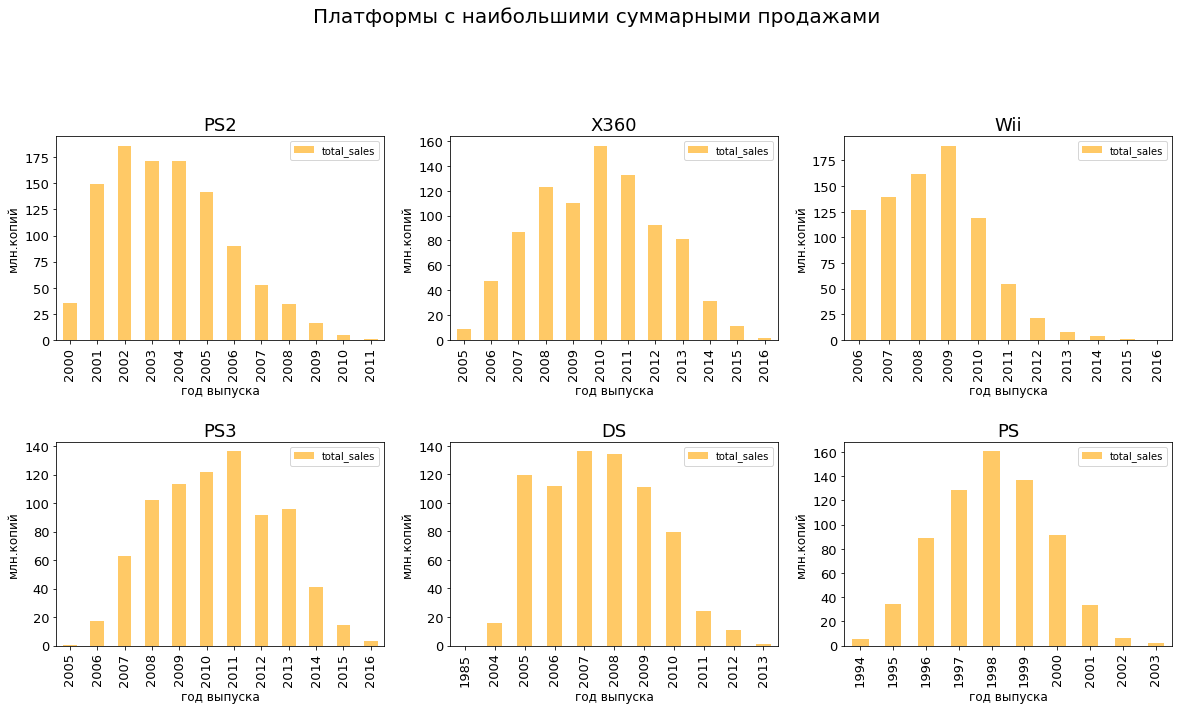

In [127]:
plarform = d['platform'][:6].tolist()
title = d['platform'][:6].tolist()
plt.figure(figsize = (20,15))
plt.subplots_adjust(hspace = 0.5)
title_set = 0
seria = 1

    
for p in plarform:
    ax = plt.subplot(3,3,seria)
    data[data['platform'] == p].pivot_table(index = 'year_of_release', 
                                                 values = 'total_sales', 
                                                 aggfunc = 'sum').plot(kind = 'bar', ax = ax,
                                                                       color='orange', alpha=0.6, 
                                                                       fontsize = 13)
    plt.suptitle('Платформы с наибольшими суммарными продажами', y =1,fontsize = 20)
    plt.ylabel("млн.копий",size = 12)
    plt.xlabel("год выпуска",size = 12)
    plt.title(title[title_set], size =18);
    seria +=1
    title_set +=1



У большинства консолей график продаж имеет вид нормального распределения.   
Средний срок жизни платформы **10** лет.  
Выделяются консоли  **Wii и PS2**  
**Wii** - высокий старт продаж в **первый** год, но через 5 лет резкое падение.  
**PS2** - быстрый рост и более раннее падение продаж по сравнению с другими консолями.  


Также на графике виден некорректный год выпуска для платформы DS - 1985  
Так как мы будем впоследствии отфильтровывать последние года для построения прогноза, данный артефакт не повлияет


**Отберем данные для построения прогноза на 2017 год**  
Так как в данном случае, нам важны последние тенденции рынка, возьмем период с **2013** года -   
Пик продаж проойден и сами продажи более - менее равномерные (см. график `количество игр по годам`)

In [128]:
data_actual = data.loc[data['year_of_release']>2012]
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating,dif,count
18,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,17.09,97.0,8.2,M,2.0,5
19,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,14.86,97.0,8.1,M,2.0,5
20,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,10.65,97.0,8.3,M,2.0,5
21,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,5.00,97.0,7.9,M,2.0,5
22,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.00,0.09,1.08,96.0,7.9,M,2.0,5


Проанализируем, какие платформы из актуального периода лидируют по продажам, растут или падают:

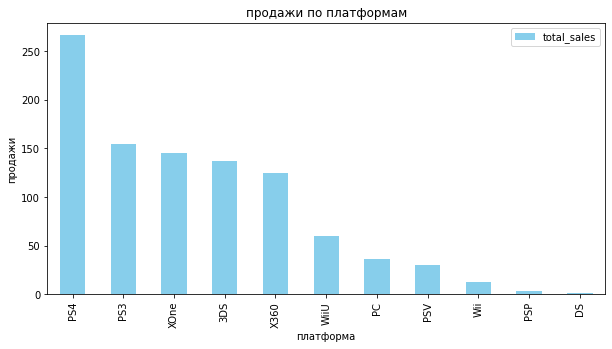

In [129]:
data_actual.pivot_table(index = 'platform',values = 'total_sales', aggfunc = 'sum'
                       ).sort_values(by='total_sales',ascending=False).plot(kind='bar', color='skyblue', figsize = (10,5));
plt.xlabel('платформа')
plt.ylabel('продажи')
plt.title('продажи по платформам')
plt.show()

Посмотрим первые 6 платформ:

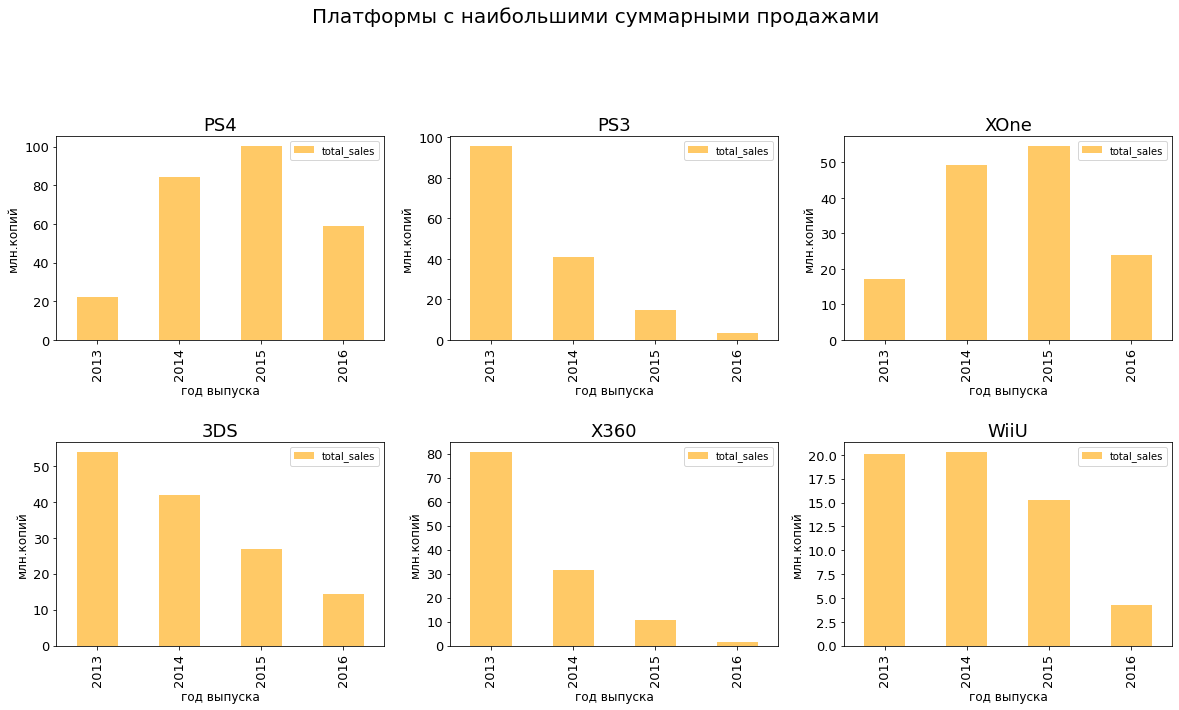

In [130]:
d2 = data_actual.pivot_table(index = 'platform',
                             values = 'total_sales',
                             aggfunc = 'sum'
                            ).sort_values(by='total_sales',ascending=False)
plarform = d2.index[:6].tolist()
title = d2.index[:6].tolist()
plt.figure(figsize = (20,15))
plt.subplots_adjust(hspace = 0.5)
title_set = 0
seria = 1

    
for p in plarform:
    ax = plt.subplot(3,3,seria)
    data_actual[data_actual['platform'] == p].pivot_table(index = 'year_of_release', 
                                                 values = 'total_sales', 
                                                 aggfunc = 'sum').plot(kind = 'bar', ax = ax,
                                                                       color='orange', alpha=0.6, 
                                                                       fontsize = 13)
    plt.suptitle('Платформы с наибольшими суммарными продажами', y =1,fontsize = 20)
    plt.ylabel("млн.копий",size = 12)
    plt.xlabel("год выпуска",size = 12)
    plt.title(title[title_set], size =18);
    seria +=1
    title_set +=1

Учтем, что данные за 2016 год могут быть неполными.  
**PS4** и **XOne** - продажи растут    
**PS4** - 1 место  
**XOne** - 2 место 

PS3, X360, WiiU - умирают, нет продаж (менее 20 млн.копий за 2015)  

**3DS** сомнителен, продажи еще не упали окончательно, но с учетом того,  
что идет четкое падение и консоль больше не выспукают, скорее нет, чем да.

Таким образом, потенциально прибыльными платформами можно назвать **PS4** и **XOne** 

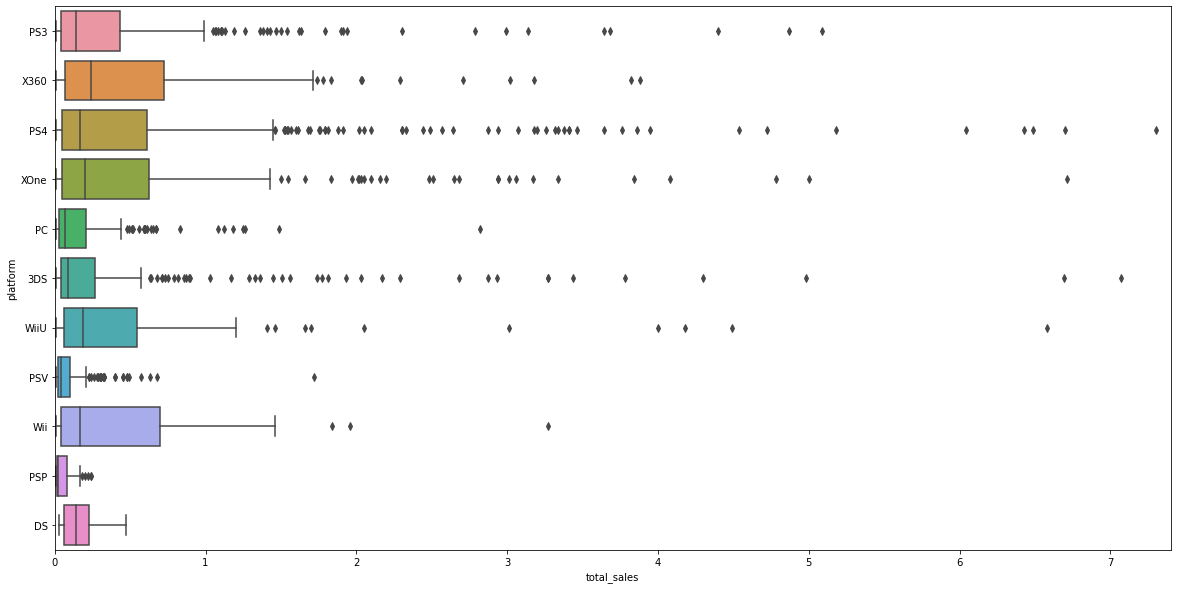

In [131]:
#Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(y="platform", x="total_sales", data = data_actual, orient="h");
plot = plt.xlim(0, 7.4)


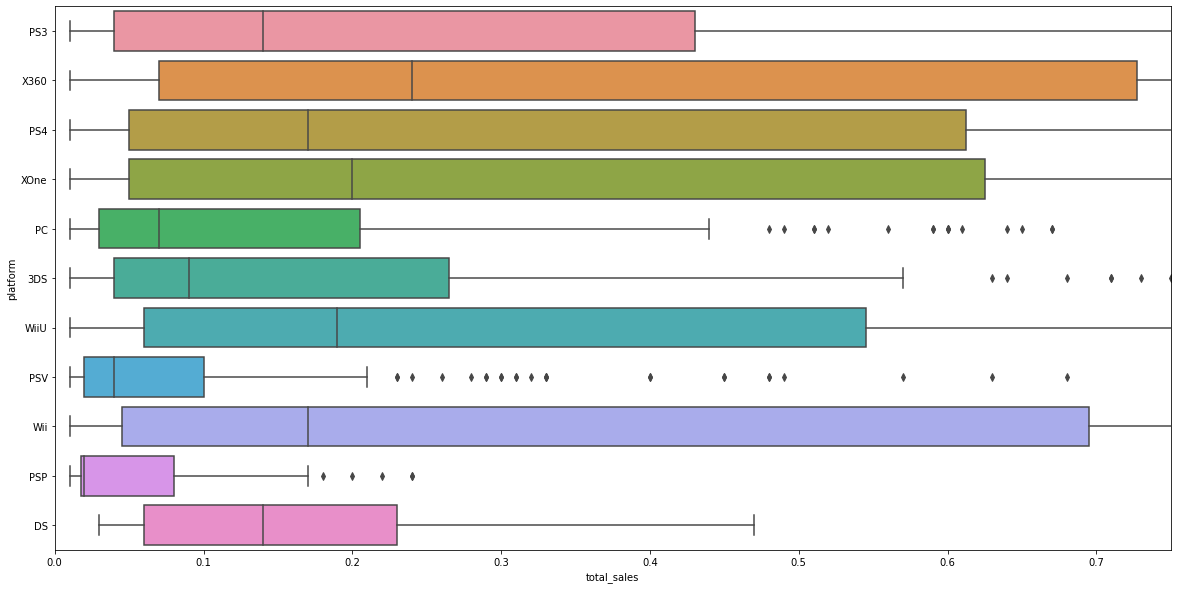

In [132]:
#увеличим масштаб
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(y="platform", x="total_sales", data = data_actual, orient="h");
plot = plt.xlim(0, 0.75)

У  крупных по продажам платформ медиана по количеству проданных копий на уровне 0,14-0,24  
Платформа, где у большинства игр самое высокое количестово проданных копий  - X360 - медиана 0,24  
У платформ PS4, XOne, X360, Wii высокие значения 0,75 квартиля - 0,6-0,7 млн.копий, при том что платформа Wii в целом продает мало в последние года.  
Очень много выбросов у PS4, то есть есть отдельные суперуспешные игры, которые были проданы очень высоким количеством копий, за счет которых она возможно и выходит на первое место по продажам


**Проверим влияние на продажи внутри платформы PS4 отзывов пользователей и критиков:**

Коэффициент Пирсона -0.031260536866669145


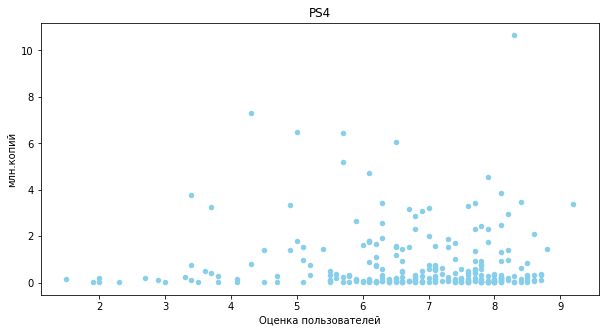

In [133]:
#диаграмма рассеяния пользователи - продажи
data_actual.loc[(data_actual['platform'] == 'PS4')
               &(data_actual['user_score'] != -1)].plot(x='user_score',y='total_sales',
                                                             kind='scatter', color='skyblue',
                                                             figsize = (10,5)).set(
                                                                                title = 'PS4',
                                                                                xlabel = 'Оценка пользователей',
                                                                                ylabel = 'млн.копий');

PS4 = data_actual.loc[(data_actual['platform'] == 'PS4')&(data_actual['user_score'] != -1)]
print("Коэффициент Пирсона", PS4['user_score'].corr(PS4['total_sales']))


Коэффициент Пирсона 0.4058867746520128


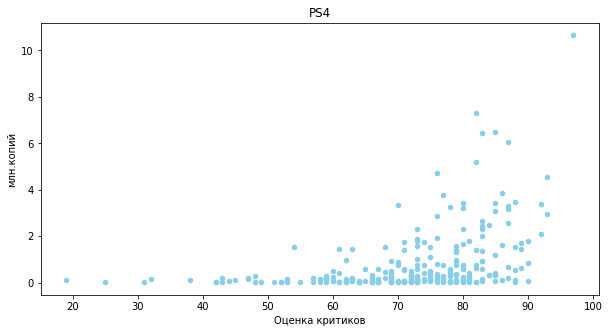

In [134]:
#диаграмма рассеяния критики - продажи
data_actual.loc[(data_actual['platform'] == 'PS4')
               &(data_actual['critic_score'] != -1)].plot(x='critic_score',y='total_sales',
                                                             kind='scatter', color='skyblue',
                                                             figsize = (10,5)).set(
                                                                                title = 'PS4',
                                                                                xlabel = 'Оценка критиков',
                                                                                ylabel = 'млн.копий');
PS4 = data_actual.loc[(data_actual['platform'] == 'PS4')&(data_actual['critic_score'] != -1)]
print("Коэффициент Пирсона", PS4['critic_score'].corr(PS4['total_sales']))

Корреляции между отзывами пользоваетелей и продажами нет  
Корреляция между отзывами критиков и продажами слабая, положительная, коэф.Пирсона 0,4   
Возможно, что высокие рейтинги критиков приводят к росту продаж,  
Или это просто очень хорошие игры, которые закономерно имеют более высокий рейтинг.  
Наверняка утверждать мы этого не можем

PS3
Коэффициент корреляции user_score и total_sales: 0.35824894745750857


<Figure size 720x2160 with 0 Axes>

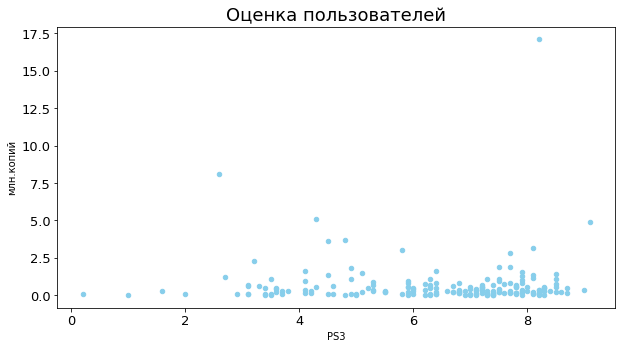

XOne
Коэффициент корреляции user_score и total_sales: 0.0018991561369883423


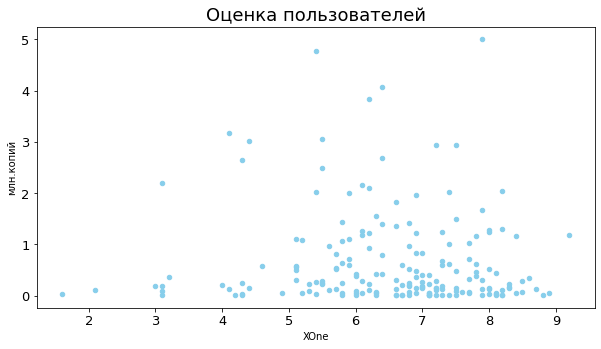

3DS
Коэффициент корреляции user_score и total_sales: -0.06880394425598693


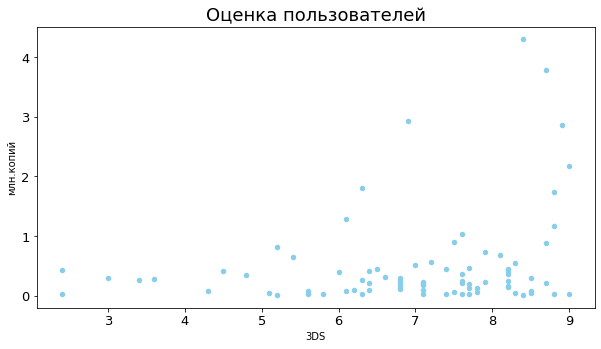

X360
Коэффициент корреляции user_score и total_sales: 0.2424137475574772


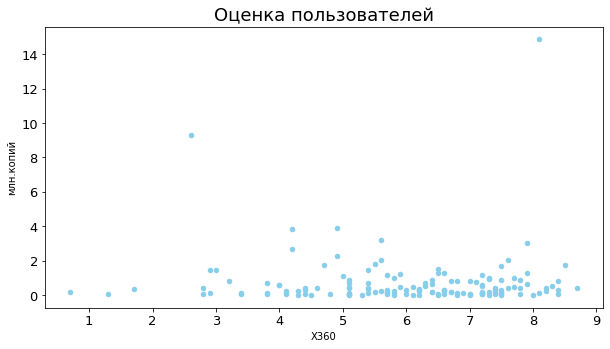

WiiU
Коэффициент корреляции user_score и total_sales: -0.011054391072611252


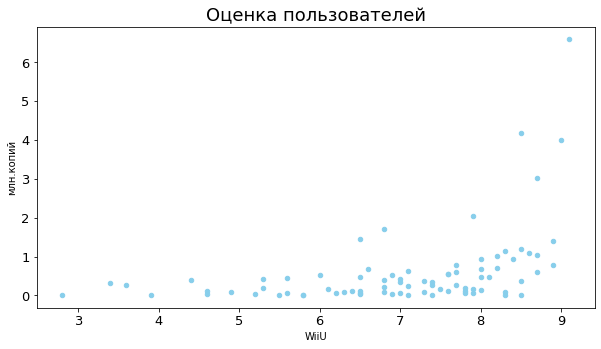

In [135]:
#посчитаем коэффициенты по другим платформам:

platform = ['PS3', 'XOne', '3DS', 'X360', 'WiiU']
title = ['Оценка пользователей']*5
plt.figure(figsize = (10,30))
plt.subplots_adjust(hspace = 0.3)
title_set = 0
seria = 1

for p in platform:
    plt.figure(figsize = (10,30))
    print(p)
    print('Коэффициент корреляции {0} и total_sales: {1}'.\
              format('user_score', data_actual2['user_score'].corr(data_actual2['total_sales'])))
    data_actual2 = data_actual.loc[(data_actual['user_score'] != -1)
                                  &(data_actual['platform'] == p)]
    ax = plt.subplot(5,1,seria)
    data_actual2.plot(x = 'user_score',y = 'total_sales',kind = 'scatter', color = 'skyblue',ax = ax,fontsize = 13)
    plt.ylabel("млн.копий")
    plt.xlabel(p)
    plt.title(title[title_set], size =18);
    seria +=1
    title_set +=1
    plt.show();

PS3
Коэффициент корреляции critic_score и total_sales: 0.3470887130571202


<Figure size 720x2160 with 0 Axes>

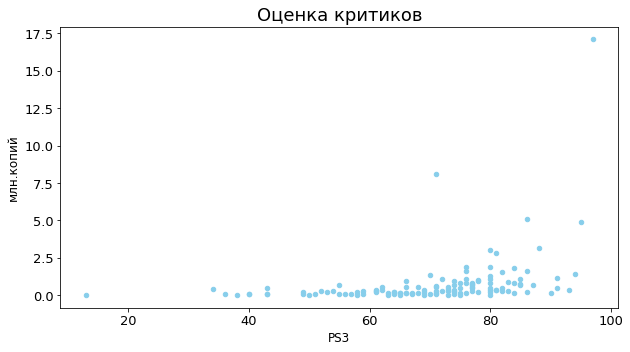

XOne
Коэффициент корреляции critic_score и total_sales: 0.3375139894933373


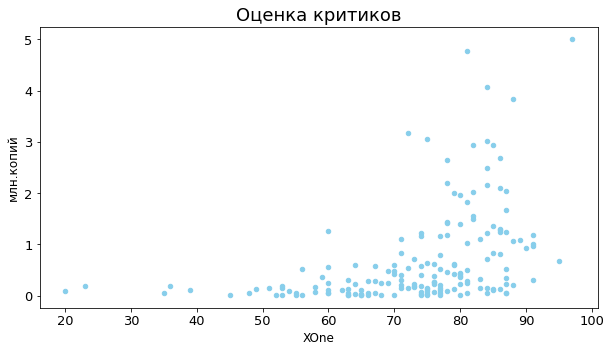

3DS
Коэффициент корреляции critic_score и total_sales: 0.41720638309101776


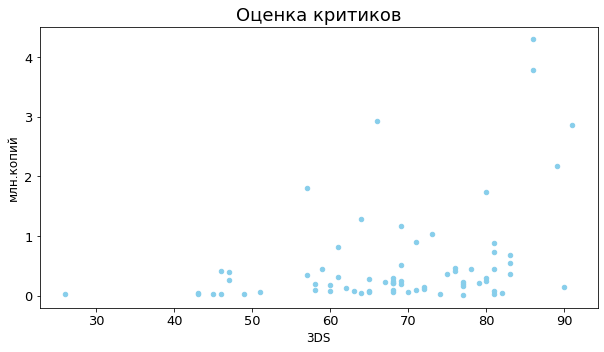

X360
Коэффициент корреляции critic_score и total_sales: 0.3556967631707933


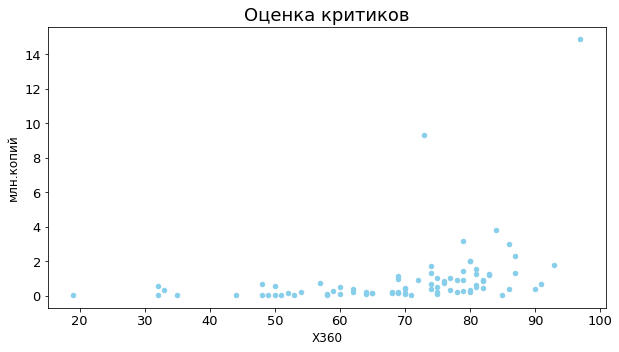

WiiU
Коэффициент корреляции critic_score и total_sales: 0.35043057872168354


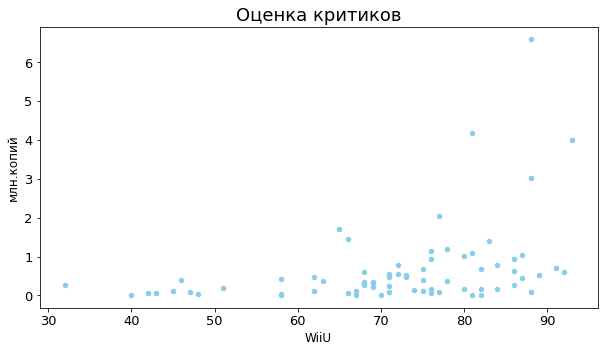

In [136]:
#посчитаем коэффициенты по другим платформам:
platform = ['PS3', 'XOne', '3DS', 'X360', 'WiiU']
title = ['Оценка критиков']*5
plt.figure(figsize = (10,30))
plt.subplots_adjust(hspace = 0.3)
title_set = 0
seria = 1

for p in platform:
    plt.figure(figsize = (10,30))
    print(p)
    print('Коэффициент корреляции {0} и total_sales: {1}'.\
              format('critic_score', data_actual2['critic_score'].corr(data_actual2['total_sales'])))
    
    data_actual2 = data_actual.loc[(data_actual['critic_score'] != -1)
                                  &(data_actual['platform'] == p)]
    ax = plt.subplot(5,1,seria)
    data_actual2.plot(x = 'critic_score',y = 'total_sales',kind = 'scatter', color = 'skyblue',ax = ax,fontsize = 13)
    plt.ylabel("млн.копий",size = 12)
    plt.xlabel(p,size = 12)
    plt.title(title[title_set], size =18);
    seria +=1
    title_set +=1
    plt.show()    

По большинству платформ такая же тенденция:  
Корреляции между отзывами пользоваетелей и продажами нет,  
Корреляция между отзывами **критиков** и продажами **слабая, положительная**, коэф.Пирсона ~ **0,4**   
Выделяются 3DS и WiiU, у них наблюдается слабая корреляция между продажами и отзывами пользоваетелей

**Посмотрим продажи по жанрам**

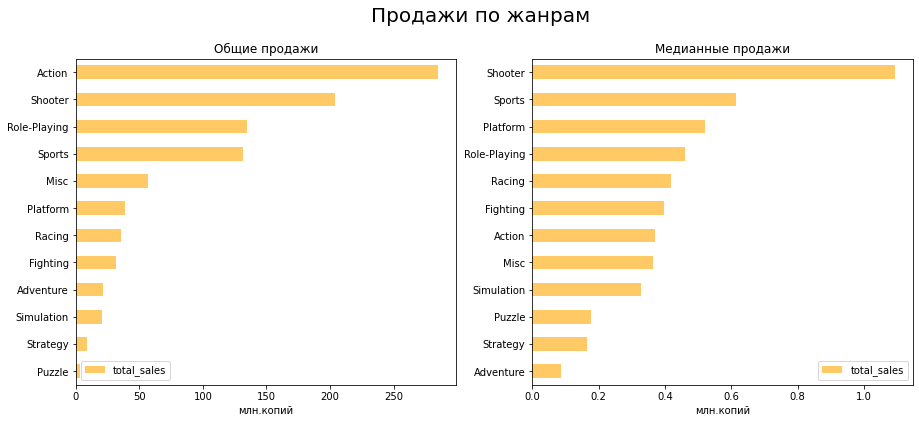

In [137]:
fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2)
plt.suptitle('Продажи по жанрам', y =1,fontsize = 20)
data_actual.pivot_table(index = 'genre',values = 'total_sales', aggfunc = 'sum'
                       ).sort_values(by='total_sales').plot(kind='barh', color='orange',
                                                            alpha=0.6, figsize = (15,6), ax=ax0);


data_actual.pivot_table(index = 'genre',values = 'total_sales', aggfunc = 'mean'
                       ).sort_values(by='total_sales').plot(kind='barh', color='orange', alpha=0.6,
                                                            figsize = (15,6), ax=ax1);



ax0.set_title("Общие продажи")
ax0.set_xlabel('млн.копий' , fontsize = 10)
ax0.set_ylabel('' , fontsize = 10)
ax1.set_title("Медианные продажи")
ax1.set_xlabel('млн.копий' , fontsize = 10)
ax1.set_ylabel('' , fontsize = 10);

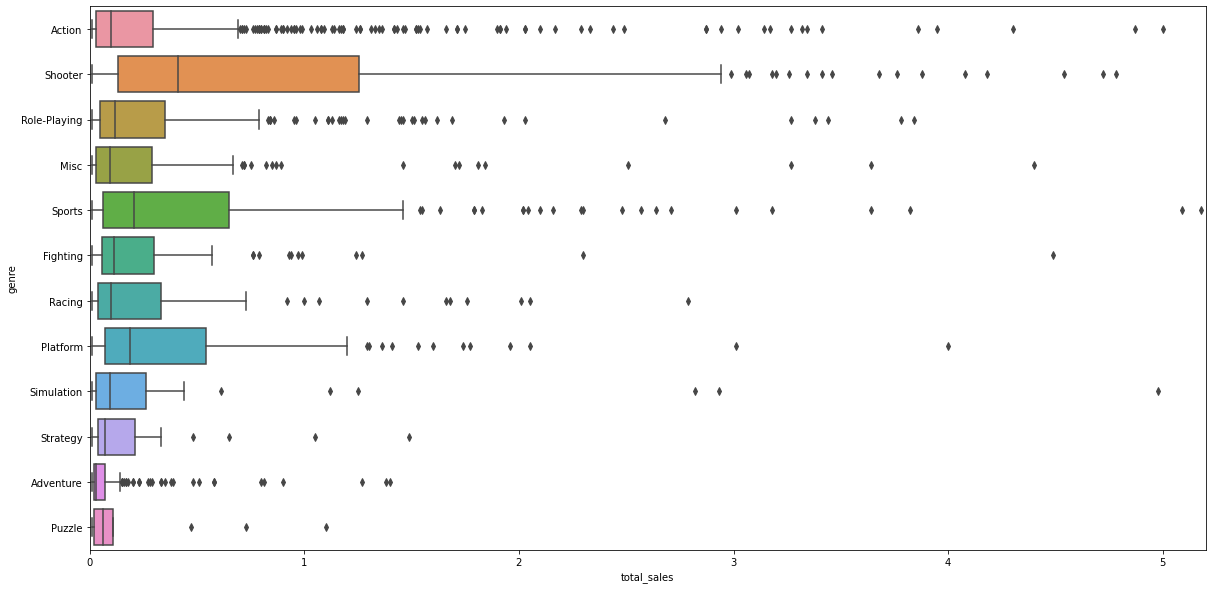

In [138]:
#Построим график «ящик с усами» по глобальным продажам игр в разбивке по жанрам
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(y="genre", x="total_sales", data = data_actual, orient="h");
plot = plt.xlim(0, 5.2)

Топ жанров по сумме продаж:   
* Экшн  
* Шутер  
* Ролевые  
* Спорт  

Самые непопулярные жанры по сумме продаж:  
* Головоломки  
* Стратегии  


На показатель общей суммы продаж прямо влияет количество выпушенных игр, чем их больше тем суммы будут больше.  

Интереснее оценить в каких жанрах большинство игр будут иметь максимальные показатели продаж  

Для этого посмотрим **медианные** продажи.  

Топ жанров по медианным продаж:
* **Шутер** - с большим отрывом от остальных жанров
* Спорт 
* Платформеры  
* Ролевые  

На последних местах квесты, стратегии и головоломки  

Диаграмма размаха иллюстрирует большое количество выбросов в жанре Экшен и гораздо более низкую медиану, чем в жанре Шутер

Самые непопулярные жанры - там где нужно думать :)
    

## Портрет пользователя каждого региона

Так как портрет пользователя нам необходим для принятия определенных решений, а не как сферический в вакууме, для его анализа возьмем актуальный период, который мы определили ранее - с 2013 года

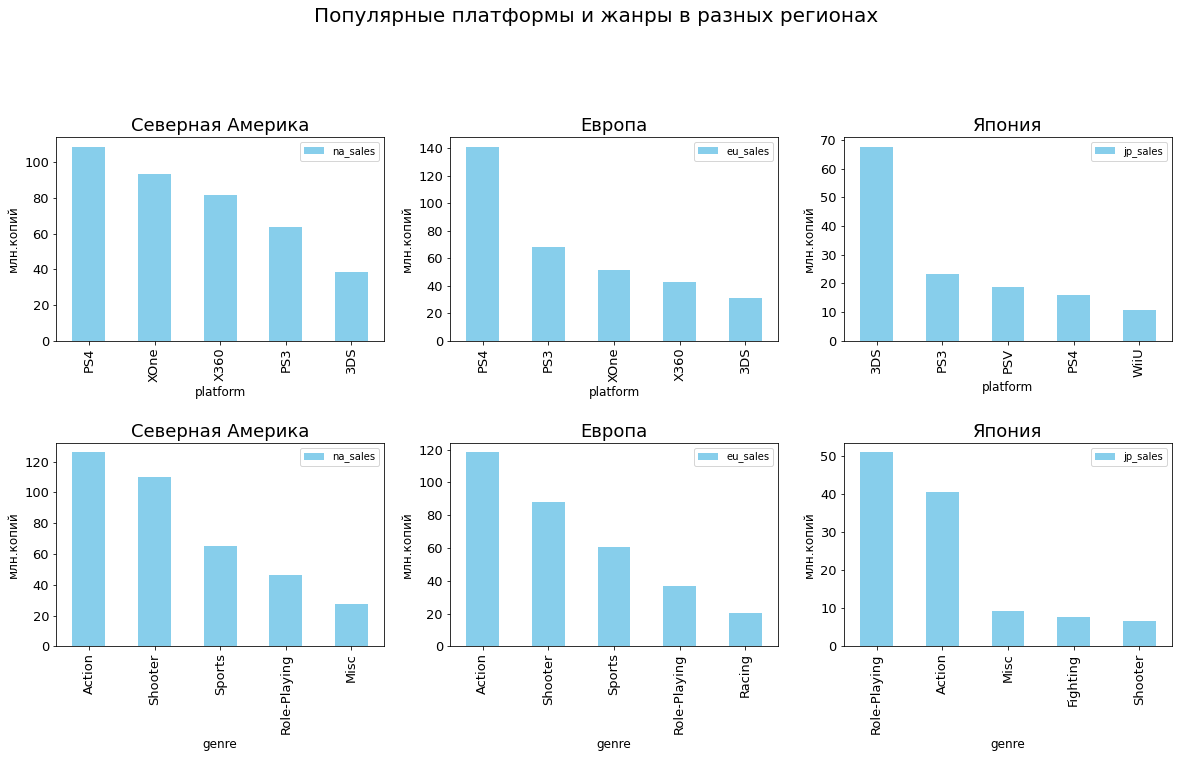

In [139]:
region = ['na_sales','eu_sales','jp_sales']
filt = ['platform','genre']
title = ['Северная Америка','Европа','Япония']*2
plt.figure(figsize = (20,15))
plt.subplots_adjust(hspace = 0.5)
title_set = 0
seria = 1

    
for f in filt:
    for r in region:
        ax = plt.subplot(3,3,seria)
        data_actual.pivot_table(index = f,
                                values = r,
                                aggfunc = 'sum').sort_values(
                                                            by=r,ascending=False)[:5].plot(
                                                                                            kind = 'bar',
                                                                                            ax = ax,
                                                                                            color='skyblue', 
                                                                                            fontsize = 13)
        plt.suptitle('Популярные платформы и жанры в разных регионах', y =1,fontsize = 20)
        plt.ylabel("млн.копий",size = 12)
        plt.xlabel(f,size = 12)
        plt.title(title[title_set], size =18);
        seria +=1
        title_set +=1


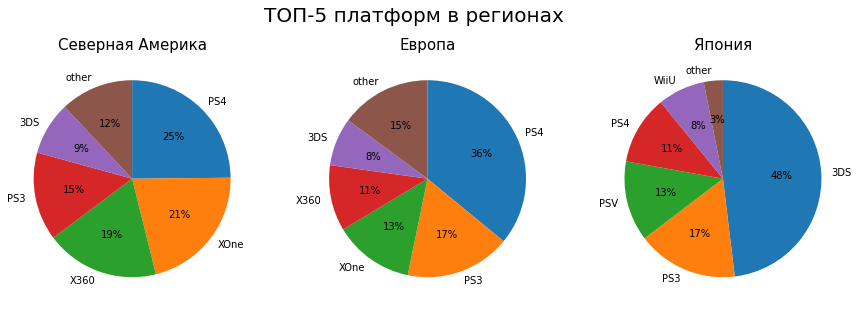

In [140]:
regions = data_actual.columns[4:7]
fig, ax = plt.subplots(1,3,figsize = (15,5))
fig.suptitle('ТОП-5 платформ в регионах',fontsize = 20)
title = ['Северная Америка','Европа','Япония']

for i in range(3):
    data_i = (data_actual.pivot_table(index = 'platform',
                                values = regions[i],
                                aggfunc = 'sum').sort_values(
                                                            by=regions[i],ascending=False).reset_index()[:5])
    data_i = data_i.append({'platform':'other',regions[i]:data_actual[regions[i]].sum()-\
                          data_i[regions[i]].sum()},ignore_index = True)
    ax[i].pie(data_i[regions[i]],labels = data_i['platform'],startangle=90,counterclock=False, autopct = '%1.0f%%')
    ax[i].set_title(title[i], fontsize =15)
plt.show()        

**Выводы:**  
В **Сев.Америке и Европе** продажи по платформам немного похожи, одинаковый список топ-5, на первом месте в обоих регионах **PS4**.  
В Европе сильный отрыв PS4 от остальных платформ, в Сев.Америке более равномерные продажи, XOne и X360 близки в первому месту, тогда как в Европе они на 3 и 4 местах, с горзадо более низкими показателями продаж. 

В **Японии** на первом месте с большим отрывом **3DS**, игры остальных консолей продаются в разы хуже.  
Игры XOne и X360 в топ продаж не вошли.  
Особенность рынка в том, что в стране больше ценятся портативные устройства.  
Кроме того, рынок в Японии сильно концентирован,все доли распределяются среди крупных игроков.   
Я бы посмотрела Японию отдельно, тк мы видели, что в целом 3DS стабильно падает последние годы.  

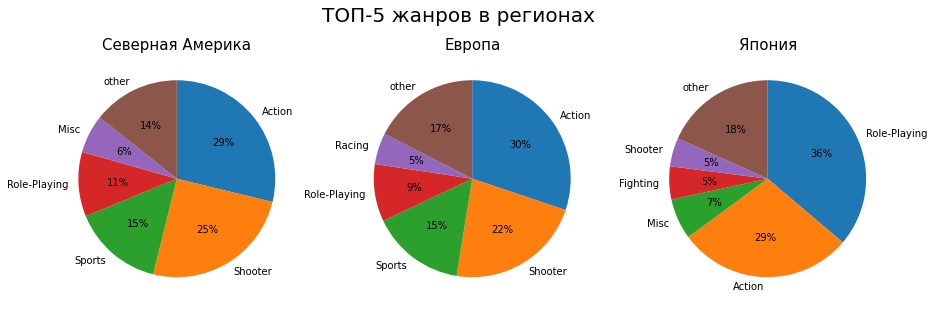

In [141]:
regions = data_actual.columns[4:7]
fig, ax = plt.subplots(1,3,figsize = (15,5))
fig.suptitle('ТОП-5 жанров в регионах',fontsize = 20)
title = ['Северная Америка','Европа','Япония']

for i in range(3):
    data_i = (data_actual.pivot_table(index = 'genre',
                                values = regions[i],
                                aggfunc = 'sum').sort_values(
                                                            by=regions[i],ascending=False).reset_index()[:5])
    data_i = data_i.append({'genre':'other',regions[i]:data_actual[regions[i]].sum()-\
                          data_i[regions[i]].sum()},ignore_index = True)
    ax[i].pie(data_i[regions[i]],labels = data_i['genre'],startangle=90,counterclock=False, autopct = '%1.0f%%')
    ax[i].set_title(title[i], fontsize =15)
plt.show() 

**Выводы:**  
Топ-4 жанров в Сев.Америке и Европе совпадают, на первых местах **экшен, шутер и спорт**.  

В Японии на 1 месте с высокой долей идет **РПГ**, который в Сев.Америке и Европе лишь на 4 месте.  
На 2 месте **экшен**. 


Оценим **влияние возрастного рейтинга** на продажи в разных регионах

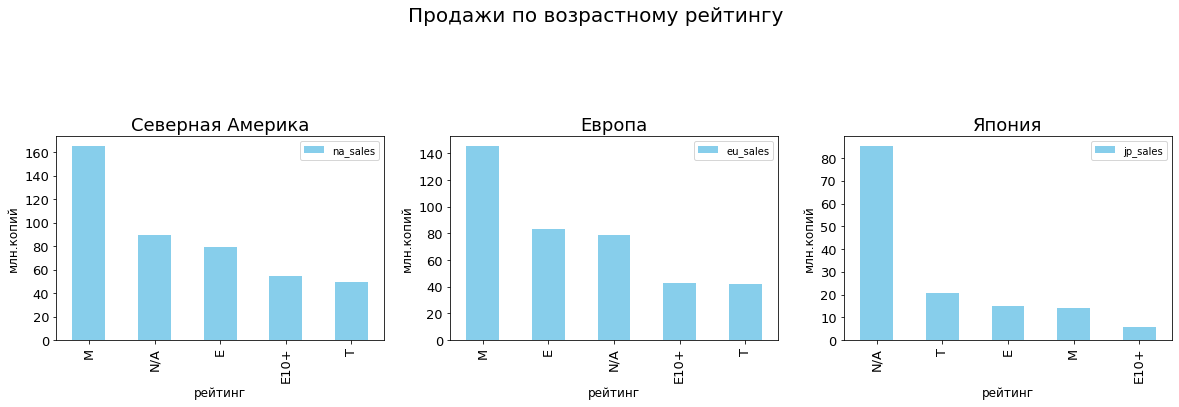

In [142]:
region = ['na_sales','eu_sales','jp_sales']
title = ['Северная Америка','Европа','Япония']
plt.figure(figsize = (20,15))
plt.subplots_adjust(hspace = 0.5)
title_set = 0
seria = 1

    
for r in region:
    ax = plt.subplot(3,3,seria)
    data_actual.pivot_table(index = 'rating',
                                values = r,
                                aggfunc = 'sum').sort_values(
                                                            by=r,ascending=False).plot(
                                                                                        kind = 'bar',
                                                                                        ax = ax,
                                                                                        color='skyblue',
                                                                                        fontsize = 13)
                                                                                        
    plt.suptitle('Продажи по возрастному рейтингу', y =1,fontsize = 20)
    plt.ylabel("млн.копий",size = 12)
    plt.xlabel('рейтинг',size = 12)
    plt.title(title[title_set], size =18);
    seria +=1
    title_set +=1

В Сев.Америке и Европе распределение продаж по рейтингу одинаковое, на первом месте игры с рейтингом `M` - Для взрослых.  
Игры без рейтинга занимают примерно одинаковый объем продаж.  
В Японии игры без рейтинга занимают первое место, тк система ESRB работает на ПО рынка США и Канады, у японских игр своя рейтинговая организация.  
Из игр с рейтингом в Японии на первом месте игры для подростков - `T`

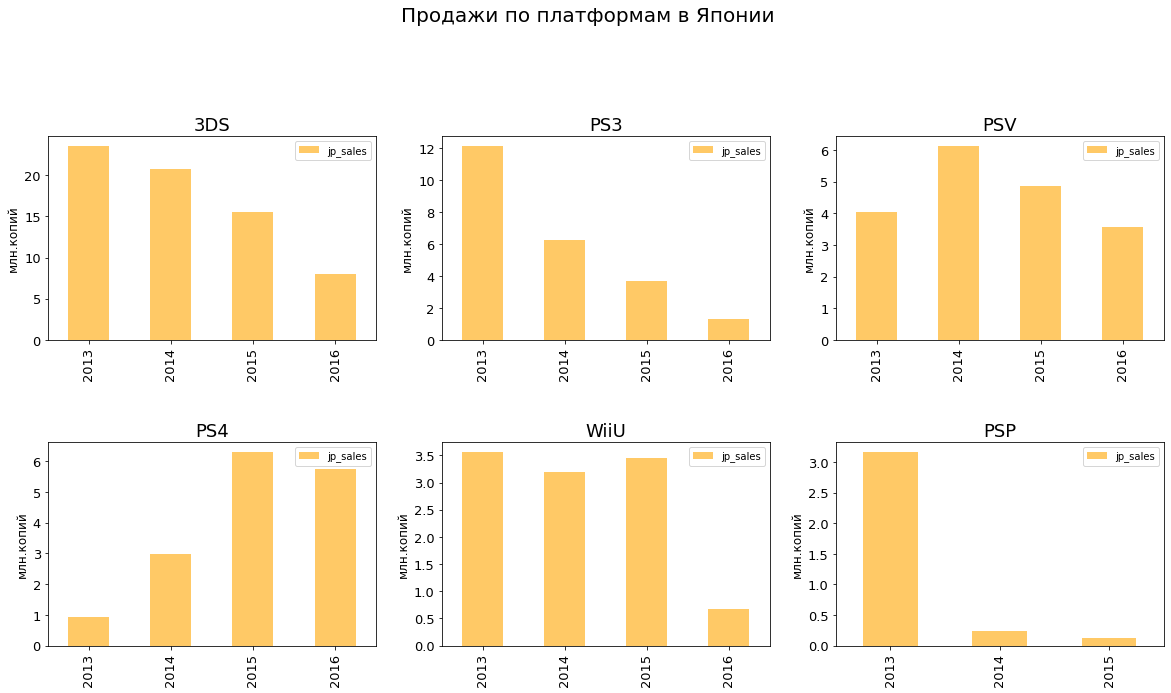

In [143]:
#посмотрим Японию отдельно по годам и платоформам:
d2 = data_actual.pivot_table(index = 'platform',
                             values = 'jp_sales',
                             aggfunc = 'sum'
                            ).sort_values(by='jp_sales',ascending=False)
plarform = d2.index[:6].tolist()
title = d2.index[:6].tolist()
plt.figure(figsize = (20,15))
plt.subplots_adjust(hspace = 0.5)
title_set = 0
seria = 1

    
for p in plarform:
    ax = plt.subplot(3,3,seria)
    data_actual[data_actual['platform'] == p].pivot_table(index = 'year_of_release', 
                                                 values = 'jp_sales', 
                                                 aggfunc = 'sum').plot(kind = 'bar', ax = ax,
                                                                       color='orange', alpha=0.6, 
                                                                       fontsize = 13)
    plt.suptitle('Продажи по платформам в Японии', y =1,fontsize = 20)
    plt.ylabel("млн.копий",size = 12)
    plt.xlabel("",size = 12)
    plt.title(title[title_set], size =18);
    seria +=1
    title_set +=1

3DS в Японии падает, также как и на рынке в целом, а по консоли PS4 также есть рост, но в абсолютных значениях 2015 года эти продажи все равно не дотягивают до 3DS. Возможно в 2016 году продажи сравняются 

В целом, можем сделать вывод, что рынок Японии очень специфический.

## Проверка гипотез

### Гипотеза о равенестве средних пользовательских рейтингов платформ Xbox One и PC

H_0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H_A: Средние пользовательские рейтинги платформ Xbox One и PC отличаются  

Значение alpha возьмем стандартное -0,05  
Для проверки гипотез используем t-тест, тк наша гипотеза о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.  
equal_var установим False, тк платформы принципиально разные



In [144]:

alpha = 0.05

results = st.ttest_ind(
    data_actual.loc[(data_actual['user_score'] != -1)&(data_actual['platform'] == 'XOne')]['user_score'], 
    data_actual.loc[(data_actual['user_score'] != -1)&(data_actual['platform'] == 'PC')]['user_score'],
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
    
    

p-значение: 0.13888973874685417
Не получилось отвергнуть нулевую гипотезу


**Вывод**  
На имеющихся данных, на уровне значимости 5% нет оснований отвергнуть нулевую гипотезу в пользу альтернативы  
Значит средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

###  Гипотеза о неравенстве средних пользовательских рейтингов жанров Action  и Sports 

H_0: Средние пользовательские рейтинги жанров Action и Sports одинаковые

H_A: Средние пользовательские рейтинги жанров Action и Sports отличаются

Значение alpha возьмем стандартное -0,05  
Для проверки гипотез используем t-тест, тк наша гипотеза о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.


In [145]:
alpha = 0.05

results = st.ttest_ind(
    data_actual.loc[(data_actual['user_score'] != -1)&(data_actual['genre'] == 'Action')]['user_score'], 
    data_actual.loc[(data_actual['user_score'] != -1)&(data_actual['genre'] == 'Sports')]['user_score'],
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.6948835429264077e-20
Отвергаем нулевую гипотезу


In [149]:
print('Средняя оценка Action', data_actual.loc[(data_actual['user_score'] != -1)&(data_actual['genre'] == 'Action')]['user_score'].mean())
print('Средняя оценка Sports',data_actual.loc[(data_actual['user_score'] != -1)&(data_actual['genre'] == 'Sports')]['user_score'].mean())

Средняя оценка Action 6.8332480818414325
Средняя оценка Sports 5.238125


**Вывод**  
На имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу в пользу альтернативы  
Значит средние пользовательские рейтинги жанров Action и Sports не равны.  
Action выше, чем Sports на 1,6 пункта.

## Общий вывод

**Цель исследования**

Выявить определяющие успешность компьютерной игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании для работы интернет-магазина.

**Основные выводы:**  
* **PS4** и **XOne** перспективные платформы на рынках **Сев. Америки** и **Европы**
* 3DS (с осторожностью) и PS4 перспективные платформы на рынке Японии  
* **шутер** и **спортивные игры** - сочетание стабильно высокого дохода внутри жанра и  высоких продаж в целом
* экшен - 1 место по продажам на рынках Сев. Америки и Европы, но берет количеством игр, а не качеством
* ролевые игры 1 место по продажам на рынке Японии  
* рейтинг **M - Для взрослых** - 1 место по продажам на рынках Сев. Америки и Европы
* есть **слабая** связь между оценками **критиков** и **продажами**, игры с высокими отзывами продаются лучше  

Идеальный продукт - шутер/спортивная игра возрастного рейтинга M на PS4/XOne с высоким рейтингом критиков для рынка Сев. Америки/Европы